In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

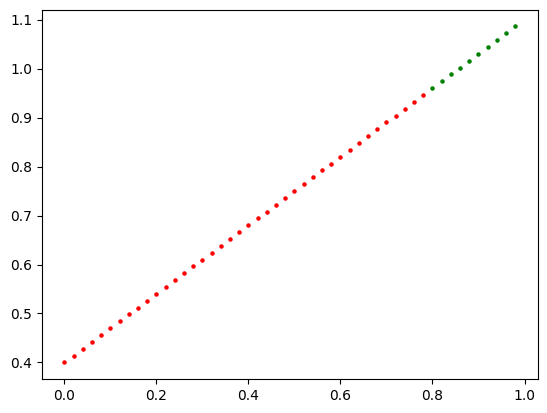

In [49]:
x = torch.arange(0, 1, 0.02, dtype=torch.float)
y = x * 0.7 + 0.4

train_len = int(len(x) * 0.8)

x_train, y_train = x[:train_len], y[:train_len]
x_test, y_test = x[train_len:], y[train_len:]

plt.scatter(x_train, y_train, c='r', s=5)
plt.scatter(x_test, y_test, c='g', s=5)

In [50]:
def plot_predictions(x_train, y_train, x_test, y_test, predictions=None):
    if predictions != None:
        plt.scatter(x_train, y_train, c='g', s=4, label='train_data')
        plt.scatter(x_test, y_test, c='b', s=20, label='test_data')
        plt.scatter(x_test, predictions, c='r', s=20, label='predictions', marker='x')
    else:
        plt.scatter(x_train, y_train, c='g', s=4, label='train_data')
        plt.scatter(x_test, y_test, c='b', s=8, label='test_data')

    plt.legend()
    plt.show()


In [51]:
class LinearModel(nn.Module):

    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear_net = nn.Sequential(
            nn.Linear(in_features=1, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),
            nn.ReLU()
        )

    def forward(self, x):
        return self.linear_net(x)

In [59]:
num_epoch = 1000
model_0 = LinearModel()

train_loss = []
test_loss = []
epoch_count = []
diff_loss = []

criterion = nn.MSELoss()
optimizer = optim.SGD(params=model_0.parameters(), lr=0.1)
for epoch in range(num_epoch):
    model_0.train()
    optimizer.zero_grad()
    model_logits = model_0(x_train.unsqueeze(1))
    loss = criterion(model_logits, y_train.unsqueeze(1))

    loss.backward()
    optimizer.step()

    model_0.eval()
    if epoch %100 == 0:
        epoch_count.append(epoch)
        train_loss.append(loss.item())
        test_preds = model_0(x_test.unsqueeze(1))
        test_loss_eval = criterion(test_preds, y_test)
        test_loss.append(test_loss_eval.item())
        diff_loss.append(loss.item() - test_loss_eval.item())
        print(f'test_loss: {test_loss_eval.item()} | loss: {loss.item()}')

test_loss: 0.49944669008255005 | loss: 0.3018879294395447
test_loss: 0.013286654837429523 | loss: 0.00230801641009748
test_loss: 0.003601951990276575 | loss: 0.0001370479294564575
test_loss: 0.0030032757204025984 | loss: 1.6479256373713724e-05
test_loss: 0.002957097254693508 | loss: 1.103468457586132e-05
test_loss: 0.0029510282911360264 | loss: 1.061432521964889e-05
test_loss: 0.002949947491288185 | loss: 1.0407110494270455e-05
test_loss: 0.002949723042547703 | loss: 1.0216405826213304e-05
test_loss: 0.0029496464412659407 | loss: 1.0033554644905962e-05
test_loss: 0.002949595218524337 | loss: 9.85764381766785e-06


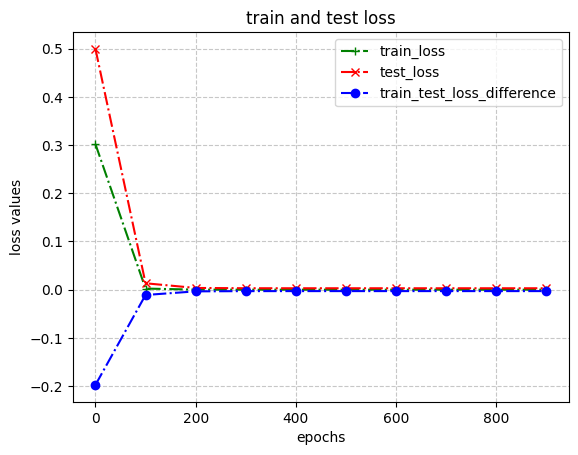

In [60]:
plt.plot(epoch_count, train_loss, label="train_loss", marker='+', c='g', linestyle='-.')
plt.plot(epoch_count, torch.Tensor(test_loss).cpu().numpy(), label="test_loss", marker='x', c='r', linestyle='-.')
plt.plot(epoch_count, torch.Tensor(diff_loss).cpu().numpy(), label="train_test_loss_difference", marker='o', c='b', linestyle='-.')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("train and test loss")
plt.xlabel("epochs")
plt.ylabel("loss values")
plt.legend()
plt.show()

model_state_dict: odict_items([('linear_net.0.weight', tensor([[ 0.3910],
        [-0.8965],
        [ 0.2605],
        [ 0.9139],
        [ 0.7119],
        [ 0.0741],
        [-0.0296],
        [ 1.0253]])), ('linear_net.0.bias', tensor([-0.1053,  0.1619, -0.2035, -0.5054,  0.8050, -0.5893, -0.2689, -0.1250])), ('linear_net.2.weight', tensor([[-0.0274, -0.2142, -0.3351,  0.0169,  0.4776, -0.3508,  0.2756,  0.3535]])), ('linear_net.2.bias', tensor([0.0605]))])
model_parameters: [Parameter containing:
tensor([[ 0.3910],
        [-0.8965],
        [ 0.2605],
        [ 0.9139],
        [ 0.7119],
        [ 0.0741],
        [-0.0296],
        [ 1.0253]], requires_grad=True), Parameter containing:
tensor([-0.1053,  0.1619, -0.2035, -0.5054,  0.8050, -0.5893, -0.2689, -0.1250],
       requires_grad=True), Parameter containing:
tensor([[-0.0274, -0.2142, -0.3351,  0.0169,  0.4776, -0.3508,  0.2756,  0.3535]],
       requires_grad=True), Parameter containing:
tensor([0.0605], requires_grad=Tr

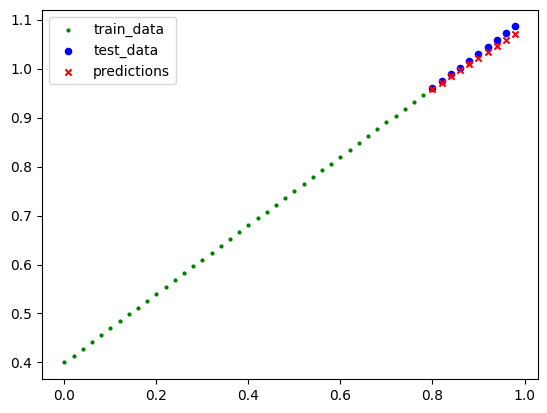

In [61]:
model_0.eval()
with torch.inference_mode():
    y_predictions = model_0(x_test.unsqueeze(1))

trained_01_dicts = model_0.state_dict()

print(f'model_state_dict: {trained_01_dicts.items()}')
print(f'model_parameters: {list(model_0.parameters())}')

plot_predictions(x_train, y_train, x_test, y_test, y_predictions)

In [63]:
from pathlib import Path

model_path = Path("models/linearreg")
model_path.mkdir(parents="True", exist_ok=True)
model_name = "linear_regression_base.pth"
model_dicts_name = "model_dicts.pth"
model_save_path = model_path / model_name
model_dicts_save_path = model_path /model_dicts_name
torch.save(obj=model_0, f=model_save_path)
torch.save(obj=model_0.state_dict(), f=model_dicts_save_path)

In [64]:
!ls -l models/linearreg/

total 8
-rw-r--r-- 1 root root 3720 Apr  3 16:33 linear_regression_base.pth
-rw-r--r-- 1 root root 2224 Apr  3 16:33 model_dicts.pth


In [65]:
loaded_model_0 = LinearModel()

loaded_model_0.load_state_dict(torch.load(f=model_dicts_save_path))

loaded_model_0.state_dict()

OrderedDict([('linear_net.0.weight',
              tensor([[ 0.3910],
                      [-0.8965],
                      [ 0.2605],
                      [ 0.9139],
                      [ 0.7119],
                      [ 0.0741],
                      [-0.0296],
                      [ 1.0253]])),
             ('linear_net.0.bias',
              tensor([-0.1053,  0.1619, -0.2035, -0.5054,  0.8050, -0.5893, -0.2689, -0.1250])),
             ('linear_net.2.weight',
              tensor([[-0.0274, -0.2142, -0.3351,  0.0169,  0.4776, -0.3508,  0.2756,  0.3535]])),
             ('linear_net.2.bias', tensor([0.0605]))])

In [67]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_preds = loaded_model_0(x_test.unsqueeze(1))

loaded_preds == y_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])